In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from helper_functions import *
import pickle

RMSE: 549.4083680793918
R2 Score: 0.7405695080681027


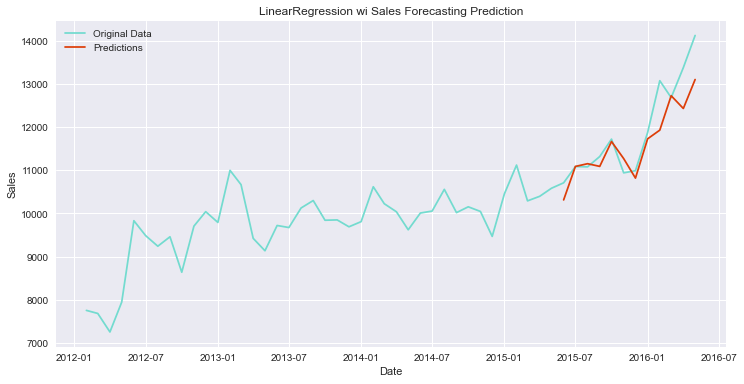

In [3]:
model('wi', LinearRegression())

RMSE: 638.279558011481
R2 Score: 0.6498514351764301


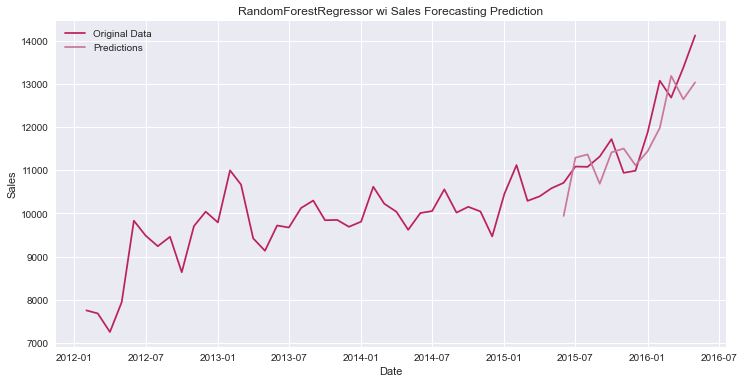

In [6]:
model('wi', RandomForestRegressor())

RMSE: 639.7743611162828
R2 Score: 0.6482094711158843


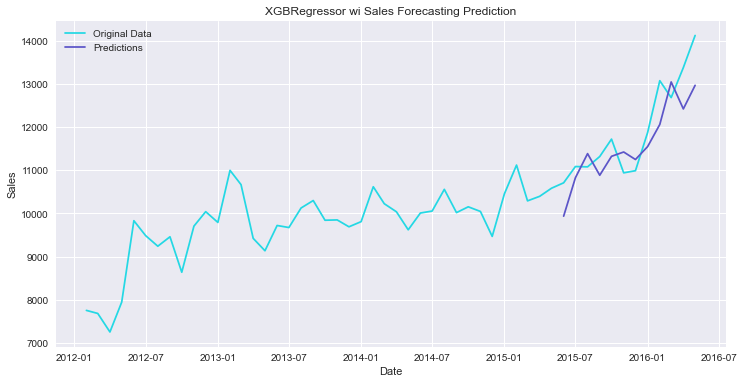

In [7]:
model('wi', XGBRegressor())

In [8]:
scores_df = pd.read_csv('../data/model_scores.csv')
scores_df

,LinearRegression_ca,RandomForestRegressor_ca,XGBRegressor_ca,LinearRegression_tx,RandomForestRegressor_tx,XGBRegressor_tx,LinearRegression_wi,RandomForestRegressor_wi,XGBRegressor_wi
0,734.065955,756.878265,835.030531,373.161681,450.983755,553.221603,549.408368,638.279558,639.774361
1,0.370678,0.330956,0.185657,0.559887,0.357177,0.032684,0.740570,0.649851,0.648209


In [9]:
scores_df.drop(['LinearRegression_ca','RandomForestRegressor_ca','XGBRegressor_ca', 'LinearRegression_tx','RandomForestRegressor_tx','XGBRegressor_tx'], axis=1, inplace=True)
scores_df

,LinearRegression_wi,RandomForestRegressor_wi,XGBRegressor_wi
0,549.408368,638.279558,639.774361
1,0.740570,0.649851,0.648209


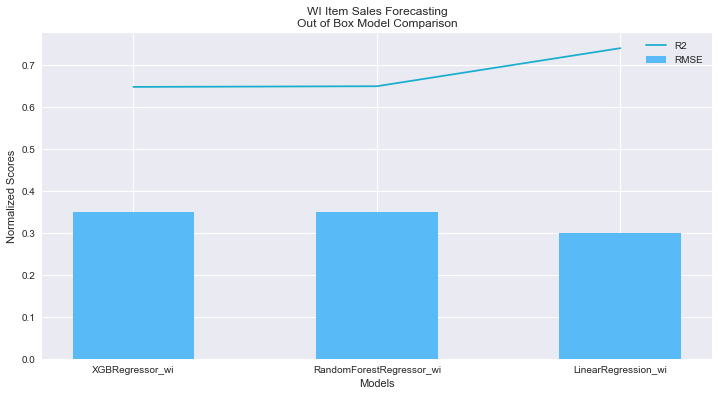

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(scores_df.columns[::-1], np.sort(scores_df.iloc[0]/scores_df.iloc[0].sum())[::-1], label='RMSE', color=gen_random_color(), width=0.5)
ax.plot(range(0, len(scores_df.columns)), scores_df.iloc[1][::-1], label='R2', color=gen_random_color())
ax.set_title('WI Item Sales Forecasting\nOut of Box Model Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Normalized Scores')
ax.legend()
plt.savefig('../images/model_outputs/wi_oob_regr_comparison.png');